In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

## Load Data & EDA

In [93]:
from pathlib import Path
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.csv")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with open(tarball_path, "w") as f:
            f.write(path="datasets")
    return pd.read_csv(Path("datasets/housing.csv"))

housing = load_housing_data()

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [105]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


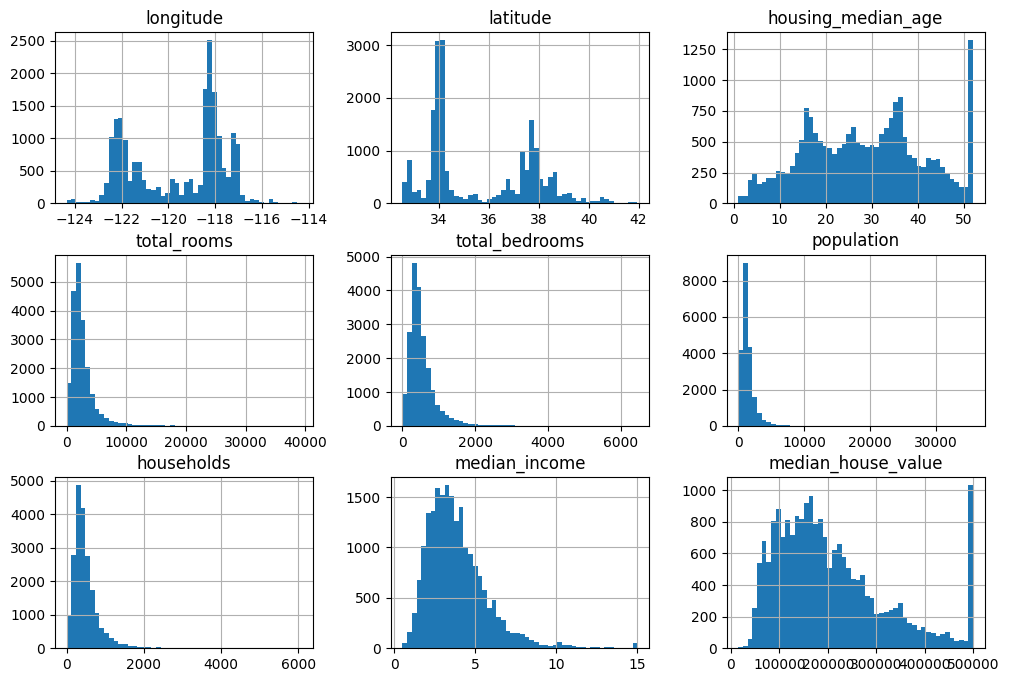

In [17]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

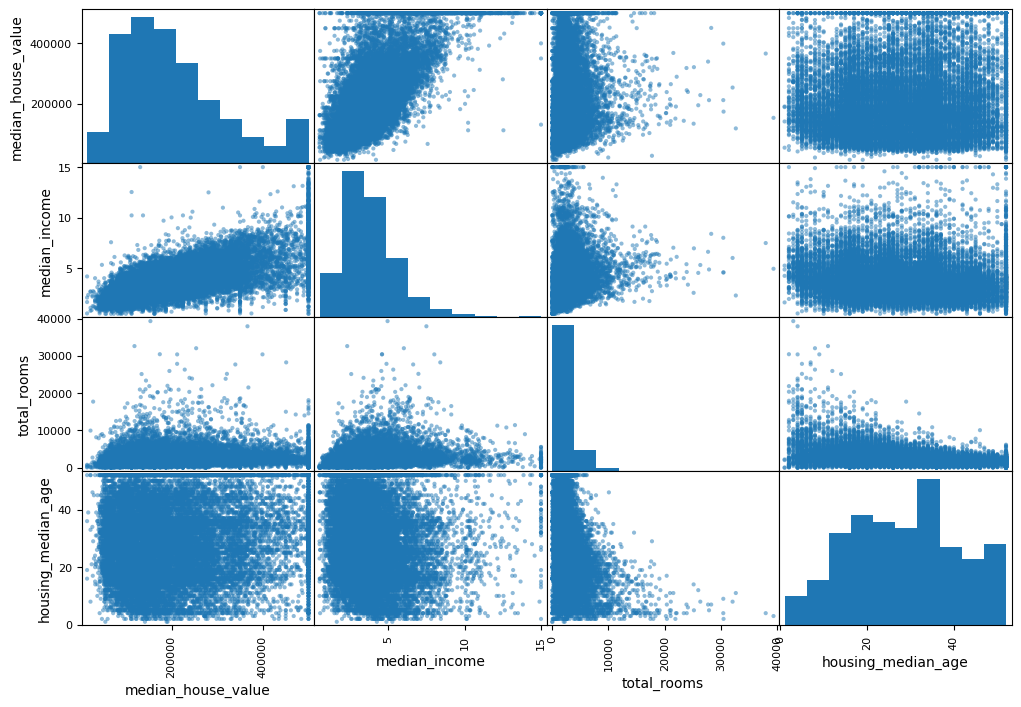

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: >

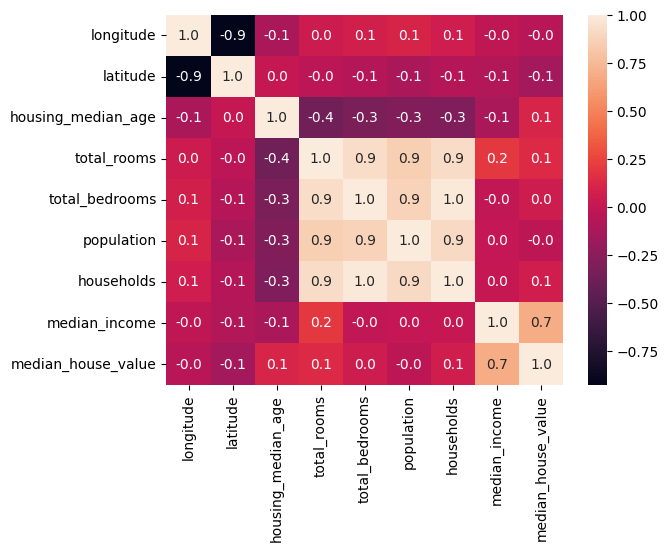

In [32]:
corr_matrix = housing.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt=".1f")

In [57]:
def cut_and_plot(data, bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5]):
    data_cat = pd.cut(data,
                       bins=bins,
                       labels=labels)
    data_cat.value_counts().sort_index().plot.bar(rot=0, grid=True)
    plt.xlabel("Income category")
    plt.ylabel("Number of districts")
    plt.show()

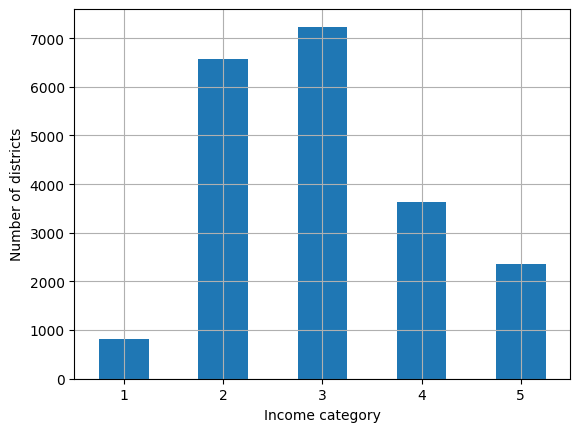

In [58]:
cut_and_plot(housing["median_income"])

## split data to train and test

In [94]:
X = housing.drop("median_house_value", inplace=False, axis=1)
y = housing["median_house_value"]

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [42]:
X_train.shape

(16512, 9)

In [43]:
X_test.shape

(4128, 9)

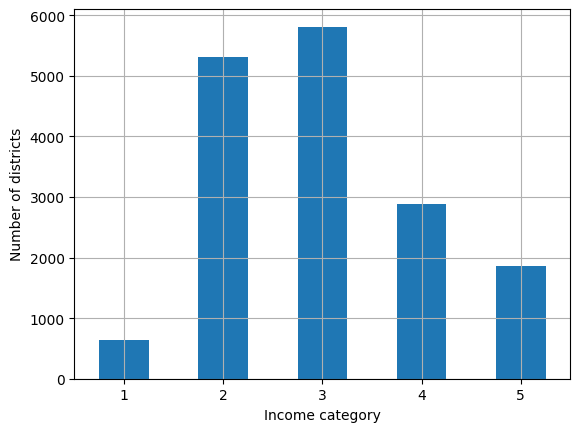

In [59]:
cut_and_plot(X_train[:, 7])

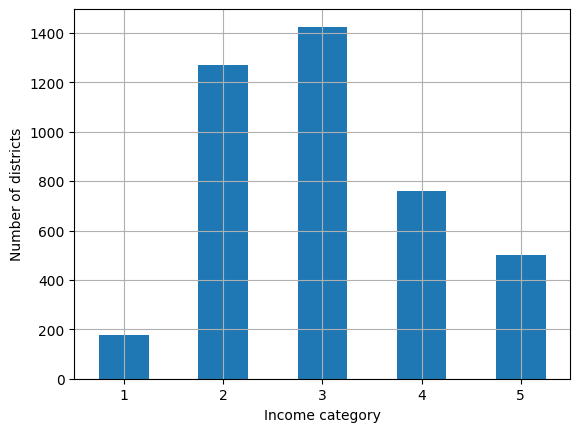

In [60]:
cut_and_plot(X_test[:, 7])

## preprocessing & transformation

In [99]:
median = X_train["total_bedrooms"].median()
X_train["total_bedrooms"].fillna(median, inplace=True)

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [101]:
X_test["total_bedrooms"].fillna(median, inplace=True)

In [102]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


In [103]:
X_train["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7313
INLAND        5276
NEAR OCEAN    2091
NEAR BAY      1827
ISLAND           5
Name: count, dtype: int64

In [104]:
X_test["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     1823
INLAND        1275
NEAR OCEAN     567
NEAR BAY       463
Name: count, dtype: int64

In [153]:
from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoder = OneHotEncoder()
cat_encoder.fit(housing["ocean_proximity"].values.reshape(-1, 1))

OneHotEncoder()

In [139]:
housing_cat_1hot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [154]:
cat_train_encoded = cat_encoder.transform(X_train["ocean_proximity"].values.reshape(-1, 1))
cat_train_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [155]:
cat_test_encoded = cat_encoder.transform(X_test["ocean_proximity"].values.reshape(-1, 1))
cat_test_encoded

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [142]:
# housing_copy = housing.copy()
# pd.get_dummies(housing_copy, columns=["ocean_proximity"], dtype='int8')

In [145]:
housing_train_num = X_train.select_dtypes(include=[np.number])
housing_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688
...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536


In [148]:
housing_test_num = X_test.select_dtypes(include=[np.number])
housing_test_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750
...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496


In [146]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(housing_train_num)

StandardScaler()

In [156]:
X_train_scaled = std_scaler.transform(housing_train_num)

In [157]:
X_test_scaled = std_scaler.transform(housing_test_num)

## train

In [158]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [159]:
lr_model.coef_

array([-84324.39744285, -89720.58253458,  14171.70013057, -16122.64354178,
        37089.00650721, -42482.56392485,  26166.18342586,  75601.2777554 ])

## evaluation

In [170]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [162]:
y_predict = lr_model.predict(X_test_scaled)

In [168]:
r2_score(y_test, y_predict)

0.6417833009591465

In [164]:
mean_squared_error(y_test, y_predict, squared=False)

70468.46315594717

In [171]:
mean_absolute_error(y_test, y_predict)

51634.92755075323

In [172]:
mean_absolute_percentage_error(y_test, y_predict)

0.3010905210332844